<a href="https://colab.research.google.com/github/hdomin/Python/blob/main/08_Ejercicio_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Data Cleaning

Ejercicios prácticos de [Udemy](https://www.udemy.com/course/data-science-bootcamp-with-python/learn/lecture/26023258#learning-tools)


Este ejercicio utilizará diferentes fuentes de datos y el objetivo es limpiarlos.

Puede descargar el .csv [aquí](https://raw.githubusercontent.com/hdomin/Python/main/bigmart.csv)

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sbn

df = pd.read_csv('bigmart.csv')
df.shape

(8523, 12)

In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
df.isnull().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

Manejo de valores atípicos

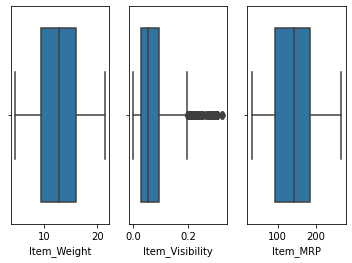

In [21]:
plt.subplot(1,3,1)
sbn.boxplot( x=df['Item_Weight'])

plt.subplot(1,3,2)
sbn.boxplot( x=df['Item_Visibility'])

plt.subplot(1,3,3)
sbn.boxplot( x=df['Item_MRP'])

plt.show()

En estas 3 variables, solamente vemos valores atípicos en Item_Visibility, por lo que procedemos a quitarlos de Data frame

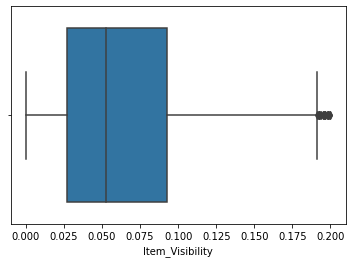

In [23]:
df = df[ df['Item_Visibility'] < 0.2]

sbn.boxplot( x= df['Item_Visibility'] )
plt.show()

In [24]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])

df['Item_Identifier'].value_counts()

FD    6016
NC    1583
DR     790
Name: Item_Identifier, dtype: int64

In [25]:
df['Item_Fat_Content'].value_counts()

Low Fat    5024
Regular    2832
LF          307
reg         117
low fat     109
Name: Item_Fat_Content, dtype: int64

Como se observa... hay que homologar Low Fat y Regular

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(('LF', 'low fat', 'reg'), ('Low Fat', 'Low Fat', 'Regular'))
df['Item_Fat_Content'].value_counts()

Low Fat    5440
Regular    2949
Name: Item_Fat_Content, dtype: int64